# 16 - Fast Fourier Transforms

## What are Fourier transforms?

As you saw in your reading, any periodic function $f(x)$ defined on a finite interval $0\le x <L$ can be written as a linear combination of sine and cosine functions that are weighted appropriately:

\begin{equation*} f(x)=\sum\limits_{k=0}^{\infty} \alpha_k \cos\left(\frac{2\pi k x}{L}\right) + \sum\limits_{k=1}^{\infty} \beta_k\sin\left(\frac{2\pi k x}{L}\right) \end{equation*}

This idea serves as the basis for what is called the ***Fourier transform***:

\begin{equation*} g(\omega) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{\infty} f(t) \exp(-i\omega t)\ \text{d}t \end{equation*}

and the corresponding ***inverse Fourier transform***:

\begin{equation*} f(t) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{\infty} g(\omega) \exp(-i\omega t)\ \text{d}\omega. \end{equation*}

In these equations, $f(t)$ represents a signal in time and $g(\omega)$ represents a weighting factor that multiplies each sinusoidal component with frequency $\omega$.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Fourier Transforms are *extremely* useful in computational and theoretical physics.

They are also very practical: for instance, they are used to encode information in images (jpegs) and audio files (mp3).

Much of the use of Fourier transforms arises from the relation

\begin{equation*} \int\limits_{-\infty}^{\infty}\left| f(t) \right|^2\ \text{d}t = \int\limits_{-\infty}^{\infty}\left| g(\omega) \right|^2\ \text{d}\omega. \end{equation*}

If the function $f(t)$ represents the amplitude of a wave, then we can expect the energy of the wave to be proportional to $\left| f(t)\right|^2$. As such, we can make a similar claim that $\left| g(\omega)\right|^2$ is proportional to the energy density in the frequency domain, often called the *power spectrum*.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Numpy has built-in functions to handle Fourier transforms

One can write their own Python functions to perform Fourier transforms as they are not complicated functions. That said, it would be very slow! Fortunately, these functions are popular enough that they have been well studied and many mathematical and computational tricks have been performed by others to write a very efficient program to perform these transforms. The resulting functions are called ***fast Fourier transforms*** (or FFT) and are given by `numpy.fft.fft` and `numpy.fft.ifft` for the forward and inverse fast Fourier transform, respectively.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Let's look at an example:

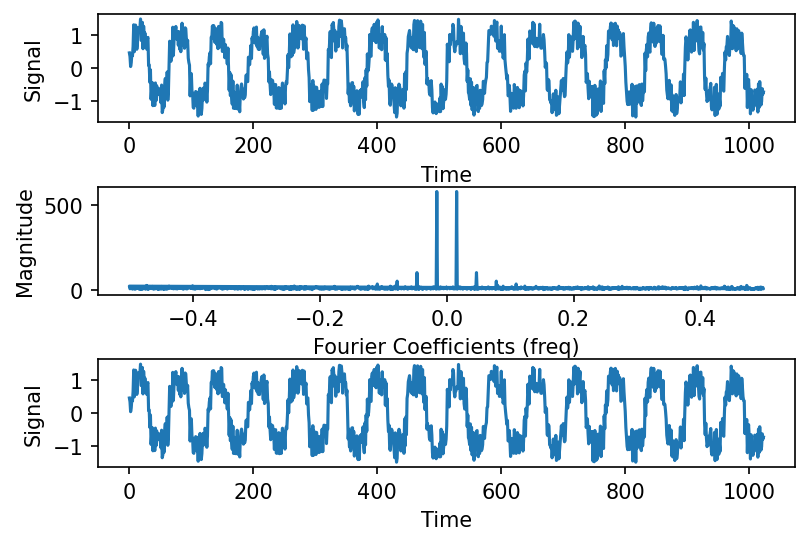

In [1]:
import matplotlib.pyplot as plt
import numpy as np
fft = np.fft

# Let's use these on the sample file pitch.txt available on Canvas!
# (FYI, this file is taken from Mark Newman's book 'Computational Physics')
y = np.loadtxt("datasets/pitch.txt",float) #An oscillating signal with noise
c = fft.fft(y)
freq = fft.fftfreq(len(c)) # Generates frequency axis associated with fft operation
y2 = fft.ifft(c)

# Make a figure
plt.figure(dpi=150)

# The raw data
plt.subplot(311)
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Signal')

# The FFT
plt.subplot(312)
plt.plot(freq,abs(c))
plt.xlabel('Fourier Coefficients (freq)')
plt.ylabel('Magnitude')

# The raw data re-retrieved via the inverse FFT
plt.subplot(313)
plt.plot(y2.real)
plt.xlabel('Time')
plt.ylabel('Signal')

plt.subplots_adjust(hspace=0.6)
plt.show()



<br><br><br><br><br><br><br><br><br><br><br><br>

## It is worth pausing to emphasize the *physical meaning* of the FFT and inverse FFT.

* The *Fourier Transform* represents a function as a set of sinusoidal waves. 

* Each wave has its own frequency, and the *Fourier coefficients* tell us the relative weighting of each frequency in our sum.

* Thus, the FFT tells us the spread of frequencies.

  + In the above example, we see that only a few frequencies are well-represented; the signal is essentially a sine wave and the rest is noise.
  
  + File compression (like jpegs) *removes* components in the FFT that have a low overall value. This makes it possible to store much less information as the image is being sent over the Internet. Then the inverse FFT reconstitutes the image (or at least its major features) for the end user.
  

**Let's look at the previous example one more time and apply a simple filter:**

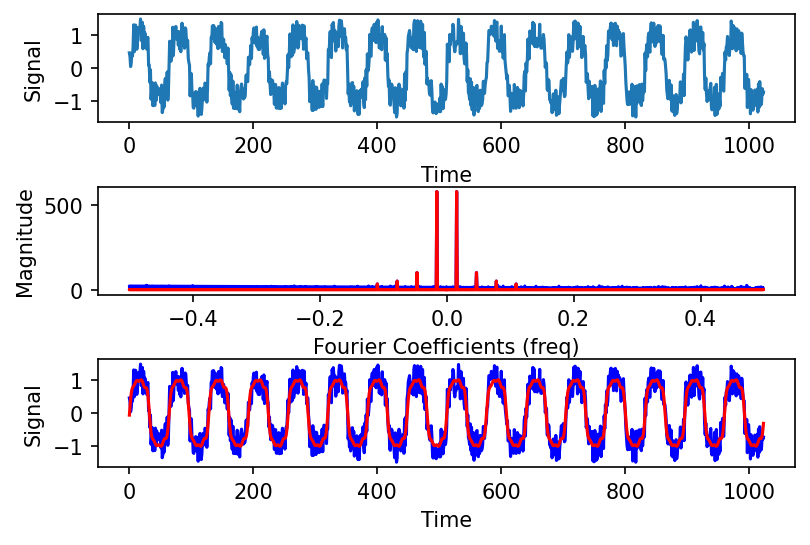

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fft = np.fft

# Let's use these on the sample file pitch.txt available on Canvas!
# (FYI, this file is taken from Mark Newman's book 'Computational Physics')
y = np.loadtxt("datasets/pitch.txt",float)
c = fft.fft(y)
cf = np.copy(c)
freq = fft.fftfreq(len(c))

# The new part!
for i in range(len(cf)):
    if abs(cf[i]) < 30:
        cf[i] = 0
        
y2 = fft.ifft(c)
y2f = fft.ifft(cf)

# Make a figure
plt.figure(dpi=150)

# The raw data
plt.subplot(311)
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Signal')

# The FFT
plt.subplot(312)
plt.plot(freq,abs(c),'b')
plt.plot(freq,abs(cf),'r')
plt.xlabel('Fourier Coefficients (freq)')
plt.ylabel('Magnitude')

# The raw data re-retrieved via the inverse FFT
plt.subplot(313)
plt.plot(y2.real,'b')
plt.plot(y2f.real,'r')
plt.xlabel('Time')
plt.ylabel('Signal')

plt.subplots_adjust(hspace=0.6)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>

## Example with sound

It is possible to analyze sound files in Python, as demonstrated below. 

* On Canvas there is a file `WilhelmScream.wav` (This is a scream commonly used in films when a random bad guy meets his demise). 

* We can open it in Spyder and make an image of its FFT.

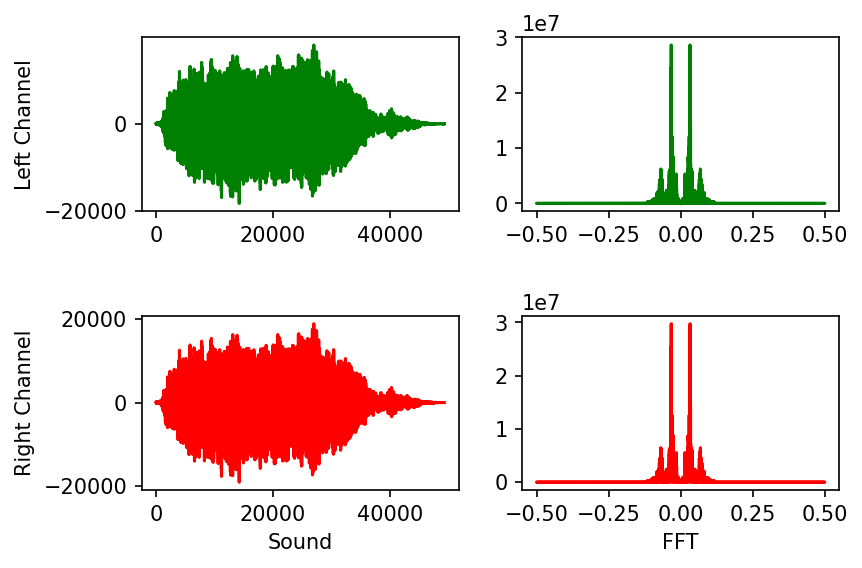

In [4]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
fft = np.fft

sample_rate, wav = wavfile.read('datasets/WilhelmScream.wav')

s1 = wav[:,0] #left channel

s2 = wav[:,1] #right channel

s1_fft = fft.fft(s1) 
s2_fft = fft.fft(s2)
freq = fft.fftfreq(len(s2_fft))



# PLOT 
plt.figure(dpi=150)
plt.subplot(221)
plt.plot(wav[:,0],'g-')
plt.ylabel('Left Channel')

plt.subplot(223)
plt.plot(wav[:,1],'r-')
plt.ylabel('Right Channel')
plt.xlabel('Sound')

plt.subplot(222)
plt.plot(freq,abs(s1_fft),'g-')

plt.subplot(224)
plt.plot(freq,abs(s2_fft),'r-')
plt.xlabel('FFT')
plt.subplots_adjust(hspace=0.6)

plt.show()

<br><br><br><br><br><br><br><br><br><br>

### Exercise

Start working on homework problems together.